# import libraries

In [1]:
from __future__ import print_function 
import os 
import pandas as pd 
import numpy as np 
%matplotlib inline 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
 # reading dataset and performing eda
data = pd.read_csv('WDIData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN


In [3]:
print('No. of rows, columns:', data.shape) 

No. of rows, columns: (383572, 67)


In [4]:
print('Column names:', data.columns) 

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')


In [5]:
nb_countries = data['Country Code'].unique().shape[0] 
print('Unique number of countries:', nb_countries) 

Unique number of countries: 266


In [6]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)'] 
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)'] 

In [7]:
print('Shape of central_govt_debt:', central_govt_debt.shape) 
print('Shape of military_exp:', military_exp.shape) 

Shape of central_govt_debt: (266, 67)
Shape of military_exp: (266, 67)


In [8]:
central_govt_debt['2010'].describe() 


count     59.000000
mean      50.882211
std       31.852305
min        0.029220
25%       25.824422
50%       49.559823
75%       68.612520
max      160.634470
Name: 2010, dtype: float64

In [9]:
military_exp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
771,Africa Eastern and Southern,AFE,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,2.050105,2.401995,...,1.775407,1.818083,1.634912,1.428237,1.503970,1.148091,1.108203,1.148447,NaN,NaN
2213,Africa Western and Central,AFW,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,1.319918,1.316566,1.436640,1.471689,...,0.824641,0.806714,0.720280,0.897885,0.883374,0.919130,0.871354,1.006796,NaN,NaN
3655,Arab World,ARB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.777088,4.63219,5.257323,3.840472,4.759900,6.050344,...,5.781257,6.417262,7.424918,6.097516,6.342684,6.087333,5.365260,5.706540,NaN,NaN


# Cross sectional data visualization

In [10]:
central_govt_debt.index = central_govt_debt['Country Code'] 
military_exp.index = military_exp['Country Code'] 

# parsing 2010 military expenditure and cental govt debt 
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])] 
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])] 
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1) 
data_to_plot.columns = ['central_govt_debt', 'military_exp'] 
data_to_plot.head() 

,central_govt_debt,military_exp
Country Code,,
ECA,21.612164,2.850259
TEC,21.612164,2.620609
NAC,85.141068,4.560837
SAS,52.120834,2.824761
TSA,52.120834,2.824761


In [11]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :] 

In [12]:
data_to_plot.shape

(47, 2)

C:\Users\kabee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 85 countries in 2010')

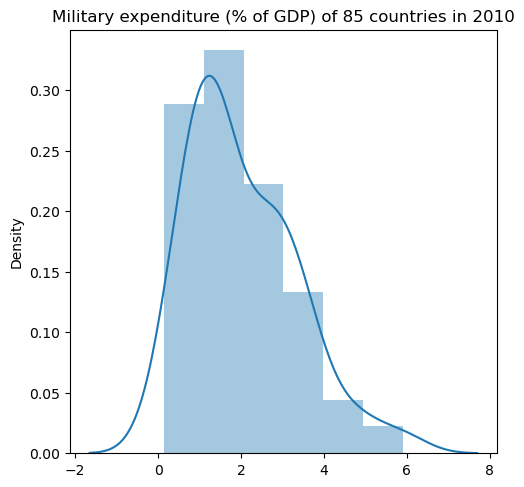

In [13]:
# plotting figure 
plt.figure(figsize=(5.5, 5.5)) 
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False) 
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010') 

C:\Users\kabee\anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: The `data2` param is now named `y`; please update your code
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2010')

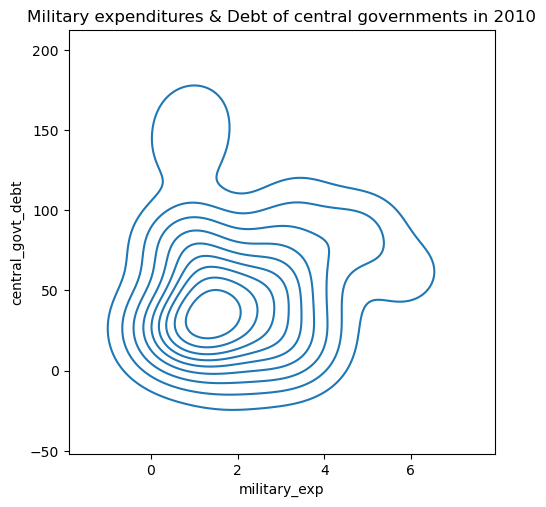

In [14]:
plt.figure(figsize=(5.5, 5.5)) 
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt) 
g.set_title('Military expenditures & Debt of central governments in 2010') 

# Time series visualization

In [15]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T 
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T 

In [16]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1) 
index0 = np.where(data_us.index=='1960')[0][0] 
index1 = np.where(data_us.index=='2010')[0][0] 
data_us = data_us.iloc[index0:index1+1,:] 
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal  Government'] 
data_us.head(10)  

,Federal Military Expenditure,Debt of Federal Government
1960,8.993125,NaN
1961,9.156032,NaN
1962,9.331673,NaN
1963,8.831891,NaN
1964,8.051281,NaN
1965,7.587247,NaN
1966,8.4353,NaN
1967,9.417796,NaN
1968,9.268454,NaN
1969,8.633264,NaN


<AxesSubplot:title={'center':'Debt of Federal Government during 1988-2010 (% of GDP)'}>

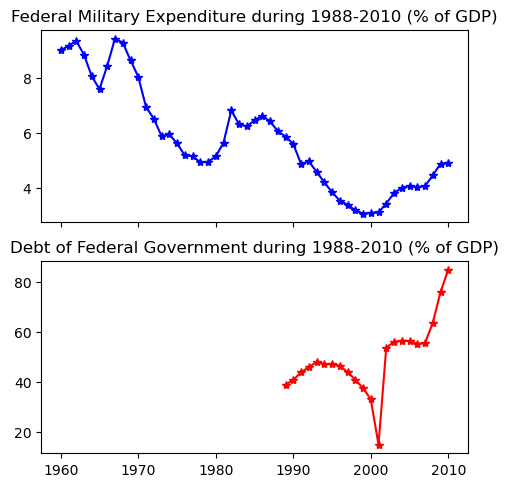

In [17]:
# plotting Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal  Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]) 

In [ ]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='CHN'),index0:index1+1
             ]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)

usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='USA'),index0:index1+1
             ]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='IND'),index0:index1+1
             ]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='GBR'),index0:index1+1
             ]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')s